**Create a simple neural network for multi-class classification**


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, OneHotEncoder
import numpy as np

In [ ]:
# Parameter Initialization
def initialize_parameters(nx, nh1, nh2, ny):
    tf.random.set_seed(1)  # Set random seed for reproducibility
    W1 = tf.Variable(tf.random.normal(shape=(nh1, nx), stddev=0.01), name="W1")
    b1 = tf.Variable(tf.zeros(shape=(nh1, 1), name="b1"))
    W2 = tf.Variable(tf.random.normal(shape=(nh2, nh1), stddev=0.01), name="W2")
    b2 = tf.Variable(tf.zeros(shape=(nh2, 1), name="b2"))
    W3 = tf.Variable(tf.random.normal(shape=(ny, nh2), stddev=0.01), name="W3")
    b3 = tf.Variable(tf.zeros(shape=(ny, 1), name="b3"))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    return parameters

In [ ]:
#Forward Pass:

def forward_pass(parameters, X):
    X = tf.cast(X, tf.float32)

    Z1 = tf.matmul(parameters["W1"], X) + parameters["b1"]
    A1 = tf.nn.relu(Z1)
    Z2 = tf.matmul(parameters["W2"], A1) + parameters["b2"]
    A2 = tf.nn.relu(Z2)
    Z3 = tf.matmul(parameters["W3"], A2) + parameters["b3"]

    # Apply softmax activation for multi-class classification
    Yhat = tf.nn.softmax(Z3, axis=0)

    return Yhat


In [ ]:
#Loss calculations

def compute_loss(Y, Yhat):
    # Cross-entropy loss
    #loss = -tf.reduce_mean(Y * tf.math.log(Yhat + 1e-10))
    loss = -tf.reduce_mean(tf.reduce_sum(Y * tf.math.log(Yhat + 1e-10), axis=0))
    return loss

In [ ]:
#Backward Pass

def backward_pass(parameters, loss, tape):
    gradients = tape.gradient(loss, parameters.values())
    return gradients

In [ ]:
#Gradient Descent To update the parameters

def update_parameters(parameters, gradients, learning_rate):

    for param, grad in zip(parameters.values(), gradients):
        param.assign_sub(learning_rate * grad)

    return parameters

In [ ]:
#Creating the Neural Network Model

def create_nn_model(train_X, train_Y, val_X, val_Y, num_iterations, learning_rate, nh1, nh2):
    nx, m = train_X.shape
    ny = num_classes  # Number of output neurons for multi-class classification

    parameters = initialize_parameters(nx, nh1, nh2, ny)

    val_losses = []
    train_losses = []

    for i in range(num_iterations):
        with tf.GradientTape() as tape:
            train_Yhat = forward_pass(parameters, tf.convert_to_tensor(train_X, dtype=tf.float32))
            train_loss = compute_loss(tf.convert_to_tensor(train_Y, dtype=tf.float32), train_Yhat)

        val_Yhat = forward_pass(parameters, tf.convert_to_tensor(val_X, dtype=tf.float32))
        val_loss = compute_loss(tf.convert_to_tensor(val_Y, dtype=tf.float32), val_Yhat)

        print("iteration {}: train_loss:{} val_loss{}".format(i, train_loss.numpy(), val_loss.numpy()))

        train_losses.append(train_loss.numpy())
        val_losses.append(val_loss.numpy())

        gradients = backward_pass(parameters, train_loss, tape)
        parameters = update_parameters(parameters, gradients, learning_rate)

    history = {"val_loss": val_losses, "train_loss": train_losses}
    return parameters, history


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = "German_digits.csv"
df = pd.read_csv(file_path)

# Extract features (X) and labels (Y)
X = df.iloc[:, :-1].values / 255.0  # Scale pixel values to the range [0, 1]
Y = df.iloc[:, -1].values

# Split the dataset into train and test
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=12)

# One-hot encode the labels
num_classes = 10  # Number of digits (0-9)
train_Y = pd.get_dummies(train_Y).values
test_Y = pd.get_dummies(test_Y).values

# Transpose the datasets
train_X = train_X.T
train_Y = train_Y.T
test_X = test_X.T
test_Y = test_Y.T

print("train_X", train_X.shape)
print("train_Y", train_Y.shape)
print("test_X", test_X.shape)
print("test_Y", test_Y.shape)

train_X (1600, 3540)
train_Y (10, 3540)
test_X (1600, 886)
test_Y (10, 886)


The model is not over fit. Validation loss not continueously decresaing, its very slowly getting decreased at each iterations.

Training loss is not fluctuating, so this may not be an indication that the learning rate is too large.



iteration 0: train_loss:nan val_loss0.2302568107843399
iteration 1: train_loss:nan val_lossnan
iteration 2: train_loss:nan val_lossnan
iteration 3: train_loss:nan val_lossnan
iteration 4: train_loss:nan val_lossnan
iteration 5: train_loss:nan val_lossnan
iteration 6: train_loss:nan val_lossnan
iteration 7: train_loss:nan val_lossnan
iteration 8: train_loss:nan val_lossnan
iteration 9: train_loss:nan val_lossnan
iteration 10: train_loss:nan val_lossnan
iteration 11: train_loss:nan val_lossnan
iteration 12: train_loss:nan val_lossnan
iteration 13: train_loss:nan val_lossnan
iteration 14: train_loss:nan val_lossnan
iteration 15: train_loss:nan val_lossnan
iteration 16: train_loss:nan val_lossnan
iteration 17: train_loss:nan val_lossnan
iteration 18: train_loss:nan val_lossnan
iteration 19: train_loss:nan val_lossnan
iteration 20: train_loss:nan val_lossnan
iteration 21: train_loss:nan val_lossnan
iteration 22: train_loss:nan val_lossnan
iteration 23: train_loss:nan val_lossnan
iteration 2

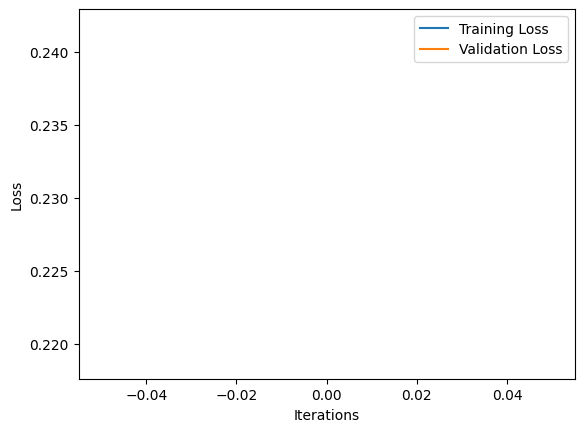

In [ ]:
# Set hyperparameters
learning_rate = 0.01
num_iterations = 50
nh1 = 64
nh2 = 8

# Train the model
parameters, history = create_nn_model(train_X, train_Y, test_X, test_Y, num_iterations, learning_rate, nh1, nh2)

# Plot the learning curves
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

Tried different combinations of learning_rate, num_iterations, nh1 and nh1. Below combinations gives better results to this model.

* learning_rate = 0.02
* num_iterations = 20
* nh1 = 128
* nh2 = 64

iteration 0: train_loss:2.3026506900787354 val_loss2.302661418914795
iteration 1: train_loss:2.302647829055786 val_loss2.3026585578918457
iteration 2: train_loss:2.3026444911956787 val_loss2.3026561737060547
iteration 3: train_loss:2.3026413917541504 val_loss2.3026535511016846
iteration 4: train_loss:2.302638530731201 val_loss2.3026514053344727
iteration 5: train_loss:2.302635669708252 val_loss2.3026487827301025
iteration 6: train_loss:2.3026325702667236 val_loss2.3026461601257324
iteration 7: train_loss:2.3026294708251953 val_loss2.3026435375213623
iteration 8: train_loss:2.302626371383667 val_loss2.302640914916992
iteration 9: train_loss:2.3026232719421387 val_loss2.302638530731201
iteration 10: train_loss:2.3026204109191895 val_loss2.302635908126831
iteration 11: train_loss:2.302617311477661 val_loss2.302633285522461
iteration 12: train_loss:2.302614450454712 val_loss2.302630662918091
iteration 13: train_loss:2.3026115894317627 val_loss2.302628517150879
iteration 14: train_loss:2.30

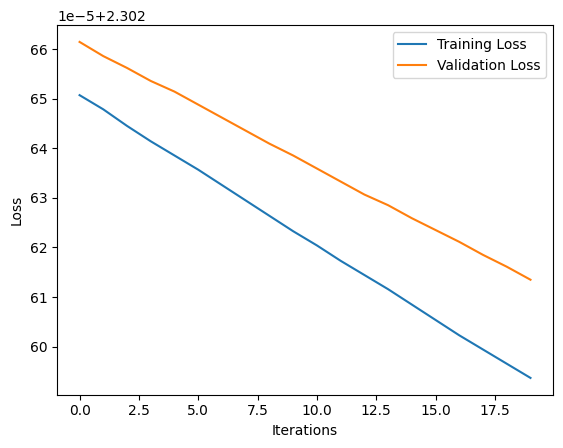

In [ ]:
# Set hyperparameters
learning_rate = 0.02
num_iterations = 20
nh1 = 128
nh2 = 64

# Train the model
parameters, history = create_nn_model(train_X, train_Y, test_X, test_Y, num_iterations, learning_rate, nh1, nh2)

# Plot the learning curves
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test Accuracy: 11.2%


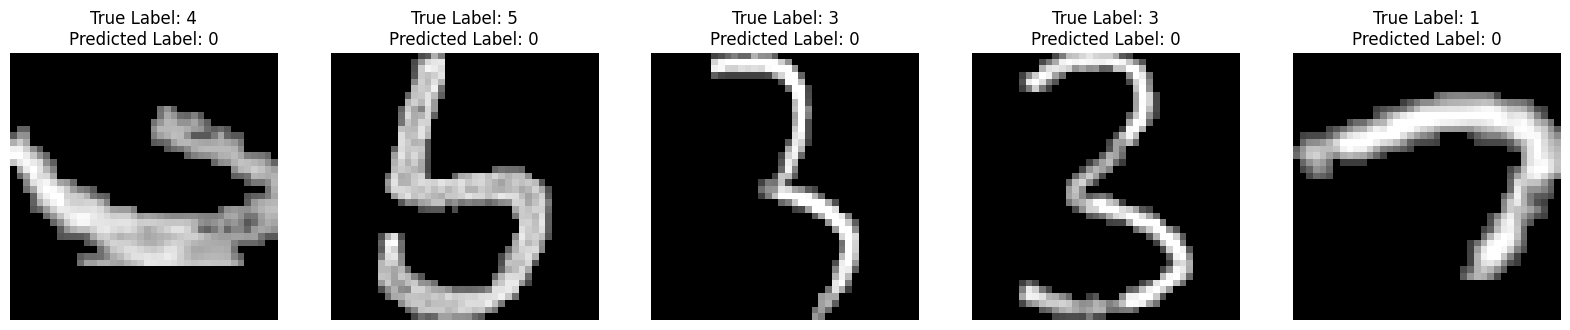

In [ ]:
# predicting and evaluating the NN model

def predict(parameters, X):
    Yhat = forward_pass(parameters, X)
    predictions = np.argmax(Yhat, axis=0)
    return predictions

# Use the trained parameters to make predictions on the test set
test_predictions = predict(parameters, tf.convert_to_tensor(test_X, dtype=tf.float32))

# Compare predicted labels with true labels to calculate test accuracy
#correct_predictions = np.sum(test_predictions == test_Y)
correct_predictions = np.sum(test_predictions == np.argmax(test_Y, axis=0))
total_samples = test_Y.shape[1]
test_accuracy = correct_predictions / total_samples * 100
print("Test Accuracy: {:.1f}%".format(test_accuracy))

# Plot a few images in the test set along with their predicted labels
num_images_to_plot = 5
random_indices = np.random.choice(test_X.shape[1], num_images_to_plot, replace=False)

plt.figure(figsize=(20, 5))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(1, num_images_to_plot, i)
    plt.imshow(test_X[:, idx].reshape(40, 40), cmap='gray')
    plt.title("True Label: {}\nPredicted Label: {}".format(test_Y[:, idx].argmax(), test_predictions[idx]))
    plt.axis('off')

plt.show()

In [ ]:
test_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0,
       0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Here is another method we can create a similar model using Keras.

**Method 2**

Epoch 1/20
111/111 [==============================] - 4s 15ms/step - loss: 0.9017 - accuracy: 0.7305 - val_loss: 0.4381 - val_accuracy: 0.8781
Epoch 2/20
111/111 [==============================] - 1s 11ms/step - loss: 0.3501 - accuracy: 0.9028 - val_loss: 0.3347 - val_accuracy: 0.9007
Epoch 3/20
111/111 [==============================] - 1s 11ms/step - loss: 0.2159 - accuracy: 0.9427 - val_loss: 0.3110 - val_accuracy: 0.9176
Epoch 4/20
111/111 [==============================] - 1s 11ms/step - loss: 0.1386 - accuracy: 0.9644 - val_loss: 0.2863 - val_accuracy: 0.9233
Epoch 5/20
111/111 [==============================] - 1s 10ms/step - loss: 0.0863 - accuracy: 0.9799 - val_loss: 0.2558 - val_accuracy: 0.9233
Epoch 6/20
111/111 [==============================] - 1s 11ms/step - loss: 0.0479 - accuracy: 0.9901 - val_loss: 0.2725 - val_accuracy: 0.9266
Epoch 7/20
111/111 [==============================] - 1s 10ms/step - loss: 0.0321 - accuracy: 0.9946 - val_loss: 0.2734 - val_accuracy: 0.9255

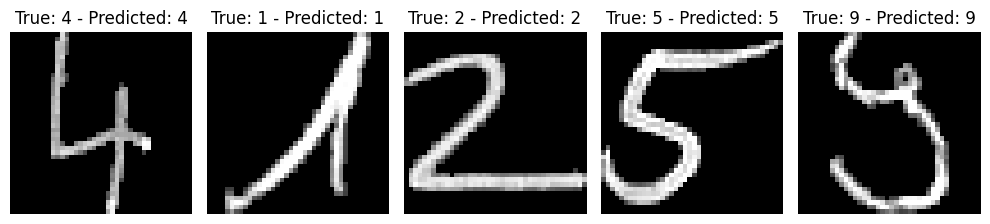

In [ ]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Extract data
data = pd.read_csv("German_digits.csv")
X = data.iloc[:, :-1].values / 255.0  # Scale pixel values to [0, 1]
Y = data.iloc[:, -1].values

# Split data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

# One-hot encode labels
num_classes = 10
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(1600,)),  # Keep input shape as (64, 64) for flattened images
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(train_X, train_Y, epochs=20, validation_data=(test_X, test_Y))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_X, test_Y)
print("Test Accuracy: {:.2f}%".format(test_acc))

# Make predictions on the test set
predictions = model.predict(test_X)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize some predictions (optional)
num_images_to_plot = 5
random_indices = np.random.choice(test_X.shape[0], num_images_to_plot, replace=False)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_plot, i + 1)
    plt.imshow(test_X[idx].reshape(40, 40), cmap="gray")
    plt.title(f"True: {test_Y[idx].argmax()} - Predicted: {predicted_classes[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()